In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [6]:
df_train = pd.read_csv('data/train.csv')
df_test = pd.read_csv('data/test.csv')
df_sub = pd.read_csv('data/sample_submission.csv')

In [7]:
df_train.shape, df_test.shape, df_sub.shape

((630000, 13), (270000, 12), (270000, 2))

In [8]:
df_train.head()

,id,age,gender,course,study_hours,class_attendance,internet_access,sleep_hours,sleep_quality,study_method,facility_rating,exam_difficulty,exam_score
0,0,21,female,b.sc,7.91,98.8,no,4.9,average,online videos,low,easy,78.3
1,1,18,other,diploma,4.95,94.8,yes,4.7,poor,self-study,medium,moderate,46.7
2,2,20,female,b.sc,4.68,92.6,yes,5.8,poor,coaching,high,moderate,99.0
3,3,19,male,b.sc,2.00,49.5,yes,8.3,average,group study,high,moderate,63.9
4,4,23,male,bca,7.65,86.9,yes,9.6,good,self-study,high,easy,100.0


In [9]:
df_train.isna().sum(axis=0)

id                  0
age                 0
gender              0
course              0
study_hours         0
class_attendance    0
internet_access     0
sleep_hours         0
sleep_quality       0
study_method        0
facility_rating     0
exam_difficulty     0
exam_score          0
dtype: int64

In [10]:
df_train.describe()

,id,age,study_hours,class_attendance,sleep_hours,exam_score
count,630000.000000,630000.000000,630000.000000,630000.000000,630000.000000,630000.000000
mean,314999.500000,20.545821,4.002337,71.987261,7.072758,62.506672
std,181865.479132,2.260238,2.359880,17.430098,1.744811,18.916884
min,0.000000,17.000000,0.080000,40.600000,4.100000,19.599000
25%,157499.750000,19.000000,1.970000,57.000000,5.600000,48.800000
50%,314999.500000,21.000000,4.000000,72.600000,7.100000,62.600000
75%,472499.250000,23.000000,6.050000,87.200000,8.600000,76.300000
max,629999.000000,24.000000,7.910000,99.400000,9.900000,100.000000


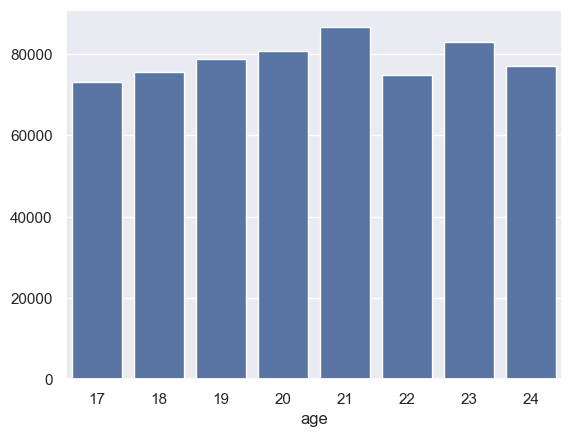

In [11]:
age_value_counts = df_train.age.value_counts()
age_values = age_value_counts.index
age_counts = age_value_counts.values
sns.set_theme(style='darkgrid')
sns.barplot(x=age_values, y=age_counts);

In [12]:
print(df_train.groupby('age').exam_score.median().sort_values(ascending=False))
print(df_train.groupby('age').exam_score.mean().sort_values(ascending=False))

age
22    63.5
23    62.9
17    62.6
18    62.5
21    62.5
20    62.5
24    62.4
19    61.9
Name: exam_score, dtype: float64
age
22    63.137706
23    62.876142
21    62.843004
20    62.537688
17    62.492596
24    62.305521
18    62.077583
19    61.738998
Name: exam_score, dtype: float64


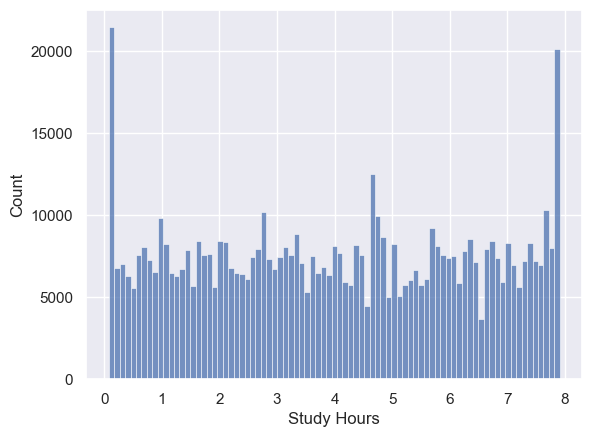

In [13]:
sns.histplot(data=df_train.study_hours)
plt.xlabel('Study Hours')
plt.show();

In [14]:
df_train[df_train.study_hours > 7.8].shape

(20848, 13)

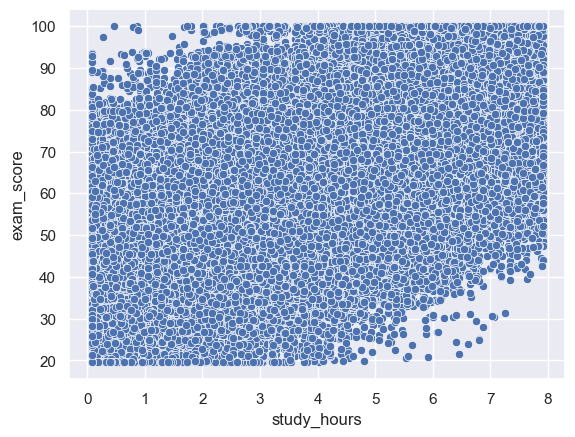

In [15]:
sns.scatterplot(x=df_train.study_hours, y=df_train.exam_score);

In [16]:
bins = [0, 1, 2, 3, 4, 5, 6, 7, 8]
labels = ['0-1', '1-2', '2-3', '3-4', '4-5', '5-6', '6-7', '7-8']
df_train['hours_group'] = pd.cut(df_train['study_hours'], bins=bins, labels=labels, right=False)
hours_group_value_counts = df_train.groupby('hours_group')['exam_score'].mean().sort_values(ascending=False)
hours_group_value_counts

C:\Users\User\AppData\Local\Temp\ipykernel_13300\815389354.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  hours_group_value_counts = df_train.groupby('hours_group')['exam_score'].mean().sort_values(ascending=False)


hours_group
7-8    83.627464
6-7    77.814127
5-6    71.951646
4-5    66.096842
3-4    59.740332
2-3    53.048823
1-2    45.948603
0-1    41.432641
Name: exam_score, dtype: float64

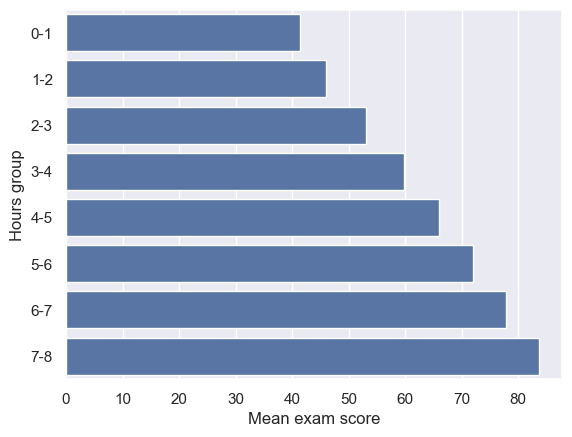

In [17]:
sns.barplot(x=hours_group_value_counts.values, y=hours_group_value_counts.index)
plt.xlabel('Mean exam score')
plt.ylabel('Hours group')
plt.show();

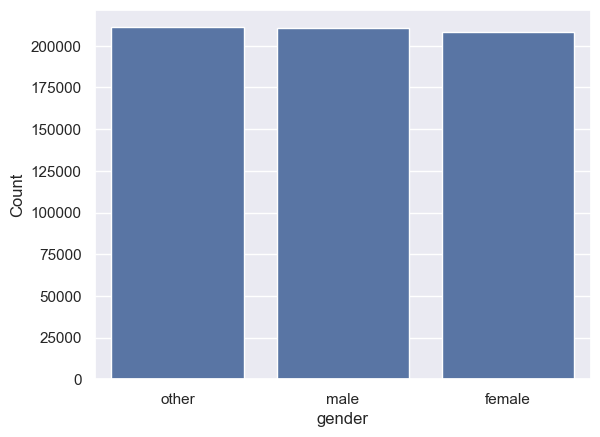

In [18]:
gender_vc = df_train.gender.value_counts()
sns.barplot(x=gender_vc.index, y=gender_vc.values)
plt.ylabel('Count');

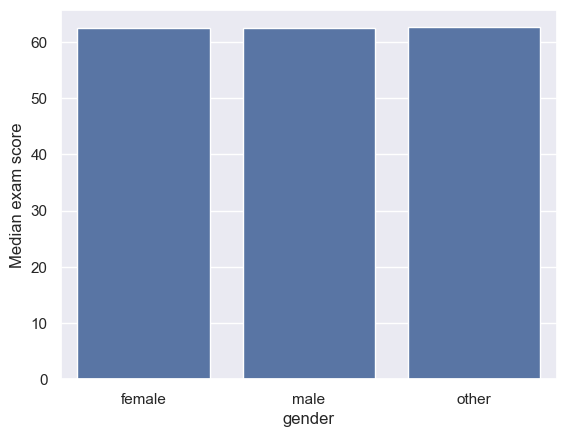

In [19]:
median_score_by_gender = df_train.groupby(df_train.gender).exam_score.median()
sns.barplot(x=median_score_by_gender.index, y=median_score_by_gender.values)
plt.ylabel('Median exam score');

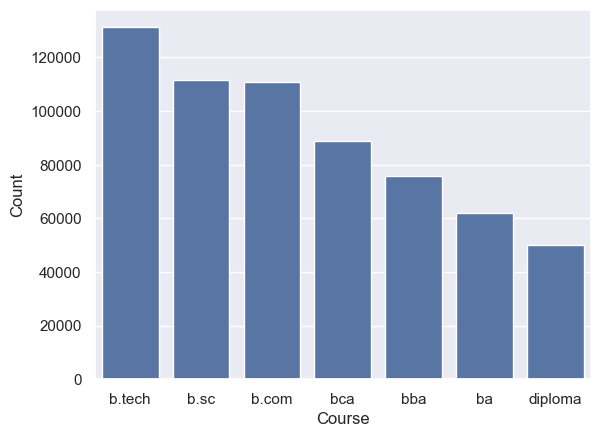

In [20]:
course_vc = df_train.course.value_counts()
sns.barplot(x=course_vc.index, y=course_vc.values);
plt.ylabel('Count')
plt.xlabel('Course');

course
bba        63.6
b.sc       63.1
bca        62.6
b.tech     62.4
ba         62.3
b.com      62.2
diploma    61.8
Name: exam_score, dtype: float64


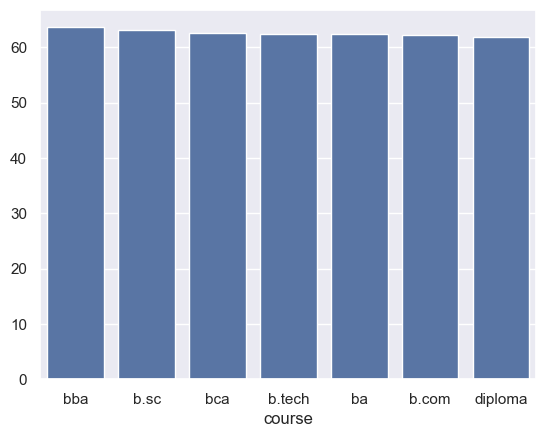

In [21]:
median_exam_score_by_course = df_train.groupby('course')['exam_score'].median().sort_values(ascending=False)
print(median_exam_score_by_course)
sns.barplot(x=median_exam_score_by_course.index, y=median_exam_score_by_course.values);

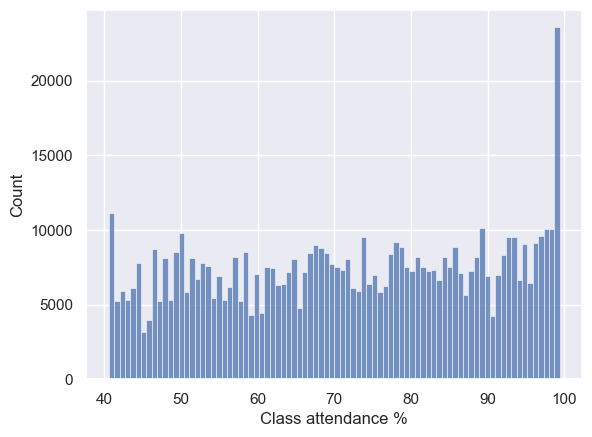

In [22]:
sns.histplot(df_train.class_attendance);
plt.xlabel('Class attendance %');

C:\Users\User\AppData\Local\Temp\ipykernel_13300\649477169.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  attendance_group_vc = df_train.groupby('class_attendance_group')['exam_score'].median().sort_values(ascending=False)


class_attendance_group
90-100    72.30
80-90     68.00
70-80     63.40
60-70     60.60
50-60     55.30
40-50     51.35
Name: exam_score, dtype: float64


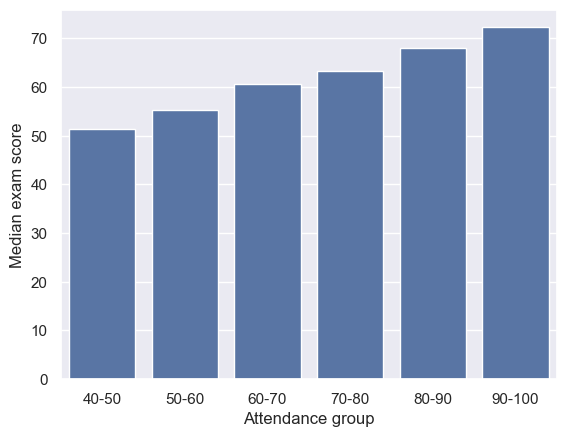

In [23]:
bins = np.linspace(40, 100, 7).astype(int)
labels = [f'{bins[i]}-{bins[i+1]}' for i in range(len(bins) - 1)]
df_train['class_attendance_group'] = pd.cut(df_train['class_attendance'], bins=bins, labels=labels, right=False)
attendance_group_vc = df_train.groupby('class_attendance_group')['exam_score'].median().sort_values(ascending=False)
print(attendance_group_vc)
sns.barplot(x=attendance_group_vc.index, y=attendance_group_vc);
plt.ylabel('Median exam score')
plt.xlabel('Attendance group');

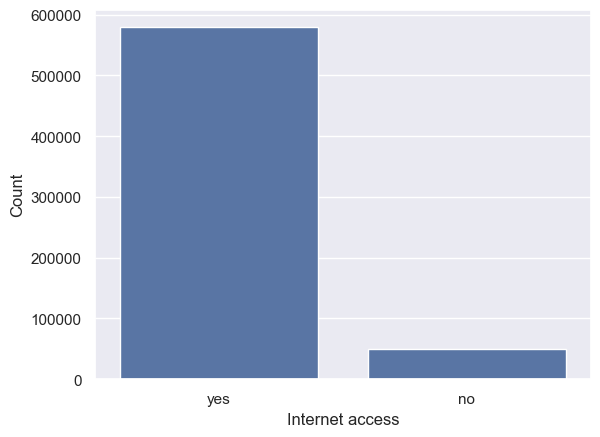

In [24]:
internet_access_vc = df_train.internet_access.value_counts()
sns.barplot(internet_access_vc);
plt.xlabel('Internet access')
plt.ylabel('Count');

internet_access
no     61.9
yes    62.6
Name: exam_score, dtype: float64


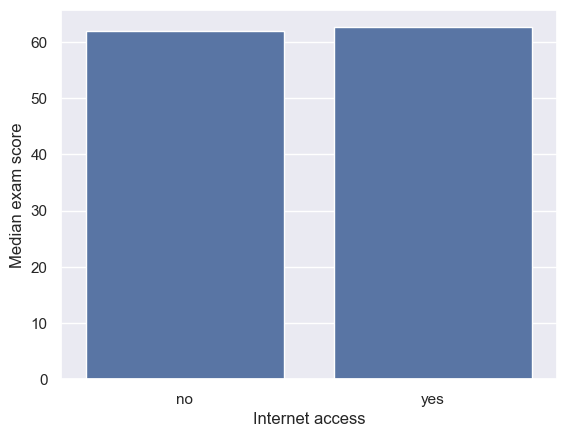

In [25]:
score_by_internet_access = df_train.groupby('internet_access')['exam_score'].median()
print(score_by_internet_access)
sns.barplot(score_by_internet_access);
plt.ylabel('Median exam score')
plt.xlabel('Internet access');

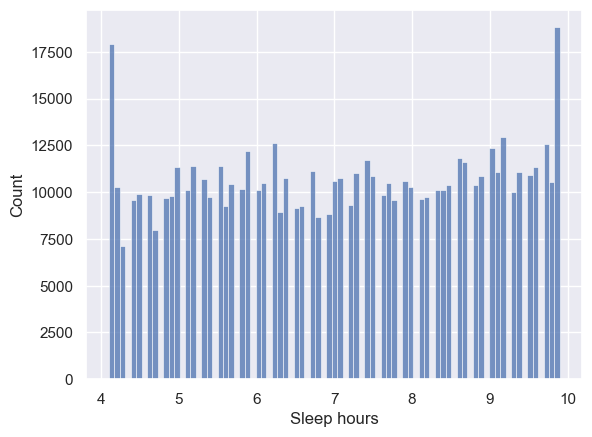

In [26]:
sns.histplot(df_train.sleep_hours)
plt.xlabel('Sleep hours');

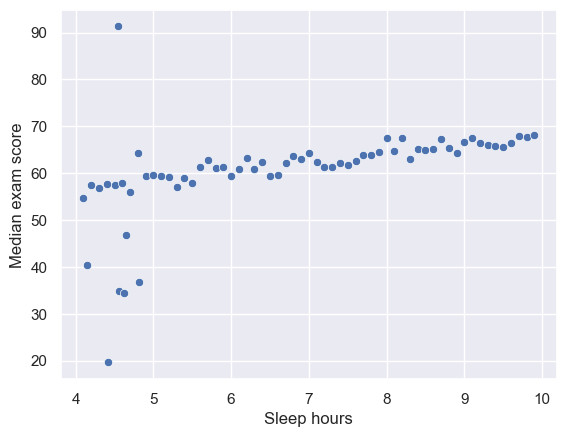

In [27]:
score_by_sleep_hours = df_train.groupby('sleep_hours').exam_score.median()
sns.scatterplot(score_by_sleep_hours)
plt.xlabel('Sleep hours')
plt.ylabel('Median exam score');

In [28]:
sleep_quality_vc = df_train.sleep_quality.value_counts()
sleep_quality_vc

sleep_quality
poor       213675
good       213089
average    203236
Name: count, dtype: int64

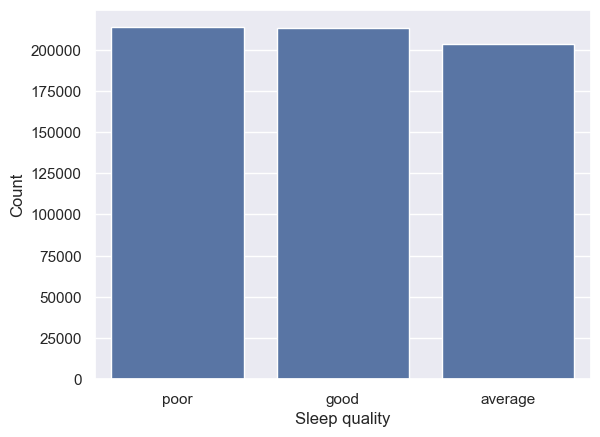

In [29]:
sns.barplot(x=sleep_quality_vc.index, y=sleep_quality_vc.values)
plt.xlabel('Sleep quality')
plt.ylabel('Count');

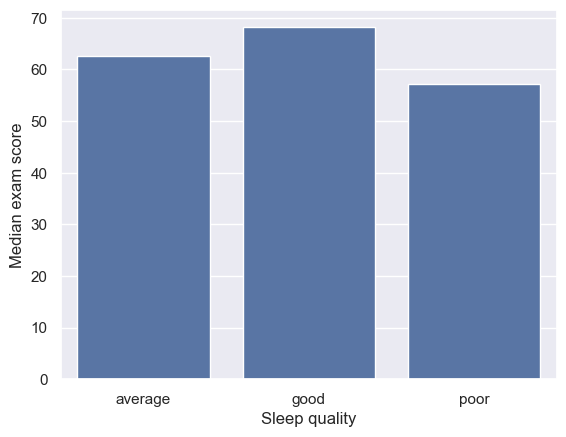

In [30]:
score_by_sleep_quality = df_train.groupby('sleep_quality')['exam_score'].median()
sns.barplot(x=score_by_sleep_quality.index, y=score_by_sleep_quality.values)
plt.xlabel('Sleep quality')
plt.ylabel('Median exam score');

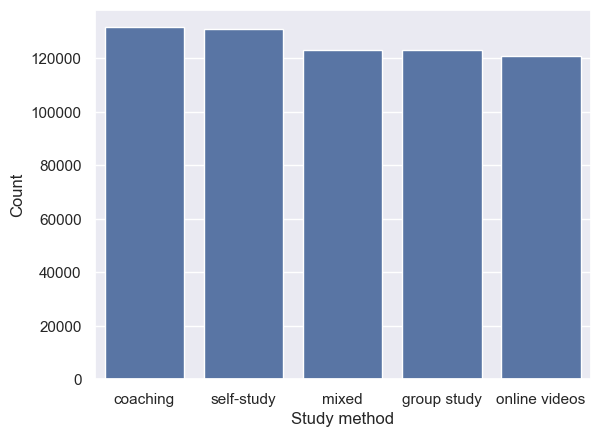

In [31]:
study_method_vc = df_train.study_method.value_counts()
sns.barplot(x=study_method_vc.index, y=study_method_vc.values)
plt.xlabel('Study method')
plt.ylabel('Count');

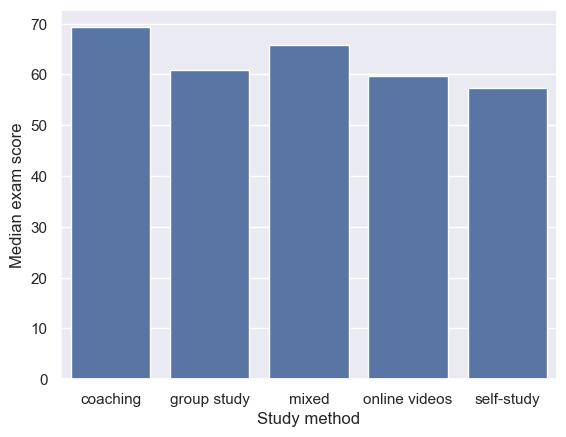

In [32]:
score_by_study_method = df_train.groupby('study_method')['exam_score'].median()
sns.barplot(x=score_by_study_method.index, y=score_by_study_method.values)
plt.xlabel('Study method')
plt.ylabel('Median exam score');

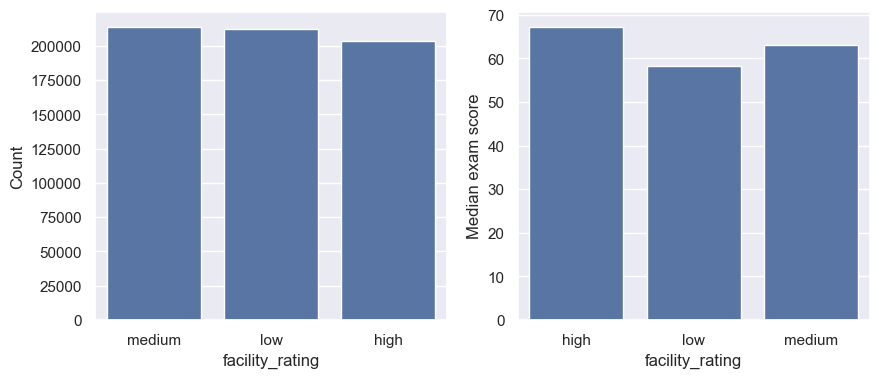

In [33]:
def show_barplots(column):
    value_counts = df_train[column].value_counts()
    score_by_column = df_train.groupby(column)['exam_score'].median()
    _, ax = plt.subplots(1, 2, figsize=(10, 4))
    sns.barplot(x=value_counts.index, y=value_counts.values, ax=ax[0])
    ax[0].set_xlabel(column)
    ax[0].set_ylabel('Count')
    sns.barplot(x=score_by_column.index, y=score_by_column.values, ax=ax[1])
    ax[1].set_xlabel(column)
    ax[1].set_ylabel('Median exam score')
    plt.show()

show_barplots('facility_rating')

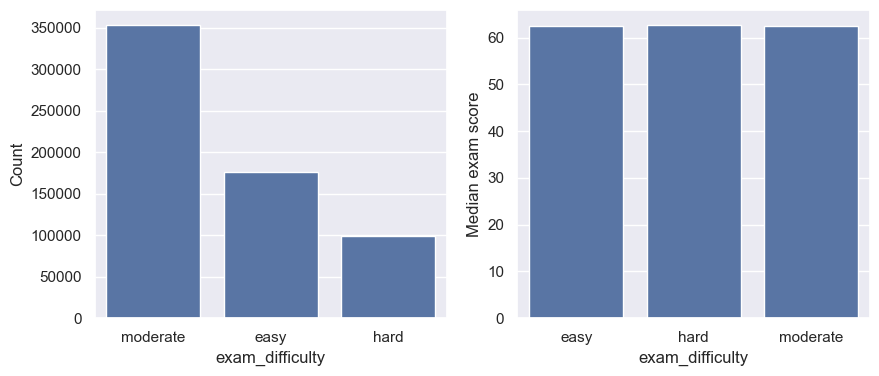

In [34]:
show_barplots('exam_difficulty')

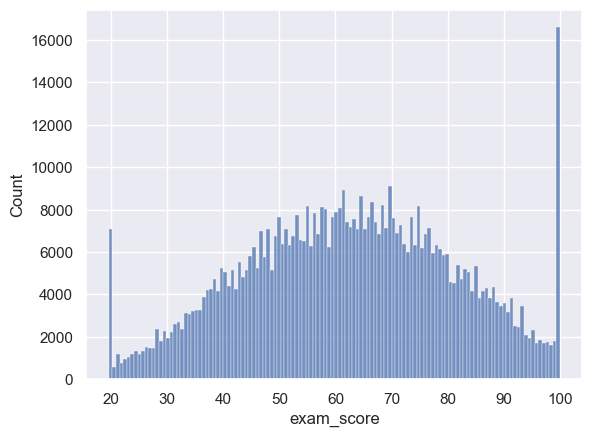

In [35]:
sns.histplot(df_train.exam_score);

In [41]:
df_train.exam_difficulty.unique()

array(['easy', 'moderate', 'hard'], dtype=object)